In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [3]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

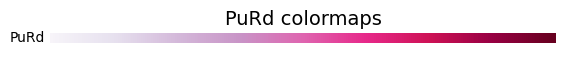

In [4]:
plot_color_gradients('PuRd', ['PuRd'])

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_79490/1118683164.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  purd_cmap = mpl.cm.get_cmap('PuRd')


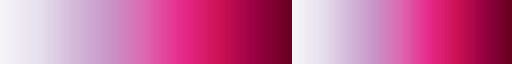

In [5]:
# Make custom colormaps, based on fraction of the original colormap

# Original colormap: PuRd

# Generate colormap with 1/4 of the original length, and 3/4 of the original length

purd_cmap = mpl.cm.get_cmap('PuRd')
purd_1 = purd_cmap(np.linspace(0, 1, 128))
purd_2 = purd_cmap(np.linspace(0, 1, 96))

# Combine them and plot the new colormap

new_purd = np.vstack((purd_1, purd_2))
new_purd_cmap = mpl.colors.ListedColormap(new_purd, name='PuRd_3/4')
new_purd_cmap


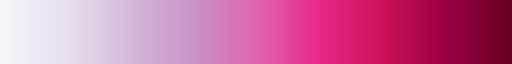

In [6]:
# Make custom colormaps, based on n partitions of the original colormap

# Original colormap: PuRd

n = 10

purd_cmap = mpl.colormaps['PuRd']

split_purd_list = []

for i in range(0, n):
    partition = purd_cmap(np.linspace(i/n, (i+1)/n, 256//n))
    split_purd_list.append(partition)

new_purd = np.vstack(split_purd_list)
new_purd_cmap = mpl.colors.ListedColormap(new_purd, name=f'PuRd_{n}')
new_purd_cmap


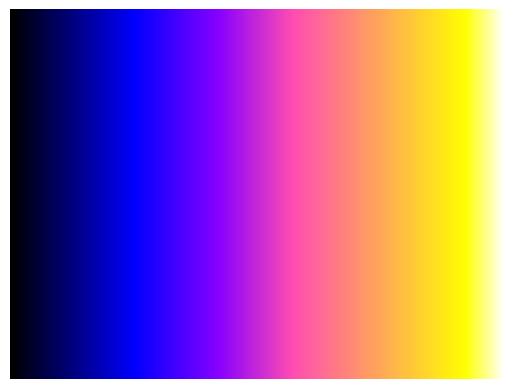

In [10]:
def split_cmap(cmap_name, n):
    cmap = mpl.colormaps[cmap_name]
    split_list = []
    for i in range(0, n):
        partition = cmap(np.linspace(i/n, (i+1)/n, 256//n))
        split_list.append(partition)
    new_cmap = mpl.colors.ListedColormap(np.vstack(split_list), name=f'{cmap_name}_{n}')
    return new_cmap

splitted_cmap = split_cmap('PuRd', 10)

plt.imshow(gradient, aspect='auto', cmap=splitted_cmap)

# generator function

def gen_cmap(cmap_name, n):
    cmap = mpl.colormaps[cmap_name]
    for i in range(0, n):
        partition = cmap(np.linspace(i/n, (i+1)/n, 256//n))
        split_cmap = mpl.colors.ListedColormap(partition, name=f'{cmap_name}_{n}')
        yield split_cmap

""" for cmap in gen_cmap('PuRd', 10):
    plt.imshow(gradient, aspect='auto', cmap=cmap)
    plt.show() """

plt.imshow(gradient, aspect='auto', cmap="gnuplot2")
plt.axis('off')
plt.savefig('gnuplot2.png', dpi=300, bbox_inches='tight')

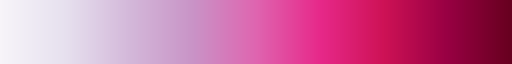

In [8]:
purd_cmap

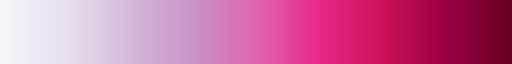

In [9]:
new_purd_cmap